# 基礎教學(with python)-001

+ 圖片讀取
+ 繪圖
+ 灰階轉換
+ 基本圖像圖像處理（裁切/翻轉/模糊化/輪廓化）

參考資料：[Medium][1], [Youtube][2]

[1]: https://medium.com/jimmy-wang/opencv-基礎教學筆記-with-python-d780f571a57a "Medium"
[2]: https://www.youtube.com/watch?v=oXlwWbU8l2o "Youtube"
+ 影片參考開頭至1:12:00

# 一、圖片讀取

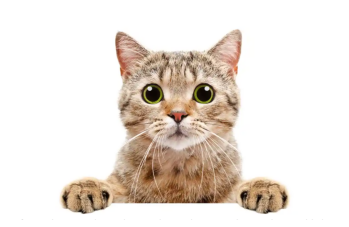

In [9]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./cat.png')
plt.axis('off')
plt.imshow(img[:,:,::-1])


# 二、繪圖

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

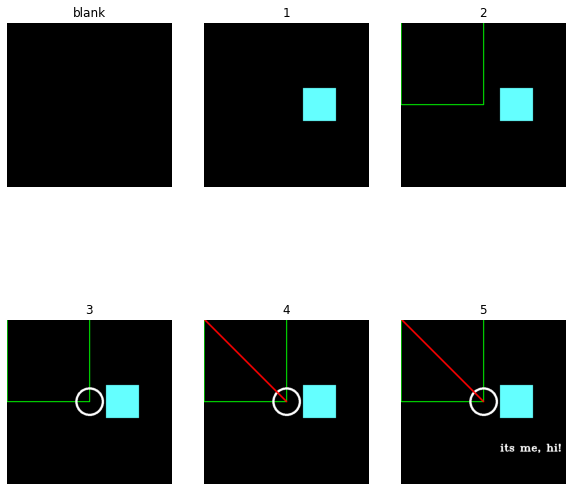

In [47]:
plt.rcParams['figure.figsize']=(10,10)

# 畫出一個空白畫布
plt.subplot(2, 3, 1)
blank = np.zeros((500,500,3), dtype='uint8')
plt.title('blank')
plt.axis('off')
plt.imshow(blank)

# 1. 畫指定位置（直接給位置參數）
plt.subplot(2, 3, 2)
blank[200:300, 300:400] = 255,255,100
plt.title('1')
plt.axis('off')
plt.imshow(blank[:,:,::-1])

# 2. 畫方框（img, 起點, 終點, 顏色, 粗度）
# if thickness = -1則為填滿
plt.subplot(2, 3, 3)
cv2.rectangle(blank, (0,0), (250,250), (0,255,0), 2)
plt.title('2')
plt.axis('off')
plt.imshow(blank[:,:,::-1])

# 畫圓形（img, 圓心位置, 半徑, 顏色, 粗度）
plt.subplot(2, 3, 4)
cv2.circle(blank, (blank.shape[1]//2, blank.shape[0]//2), 40, (255,255,255), 5)
plt.title('3')
plt.axis('off')
plt.imshow(blank[:,:,::-1])

# 畫線條（img, 起點, 終點, 顏色, 粗度）
plt.subplot(2, 3, 5)
cv2.line(blank, (0,0), (blank.shape[1]//2, blank.shape[0]//2), (0,0,255), 3)
plt.title('4')
plt.axis('off')
plt.imshow(blank[:,:,::-1])

# 加入文字（img, 文字內容, 起點, 字體, 大小, 顏色, 粗度）
plt.subplot(2, 3, 6)
cv2.putText(blank, 'its me, hi!', (300, 400), cv2.FONT_HERSHEY_TRIPLEX, 1.0, (255,255,255), 2)
plt.title('5')
plt.axis('off')
plt.imshow(blank[:,:,::-1])

# 三、圖像處理與形態學(Morphology)

+ 平移(translation)
+ 旋轉(rotation)
+ 顏色轉換(converting)
+ 模糊化(blur)
+ 輪廓化(edge cascade)
+ 膨脹(dilating)
+ 侵蝕(eroding)

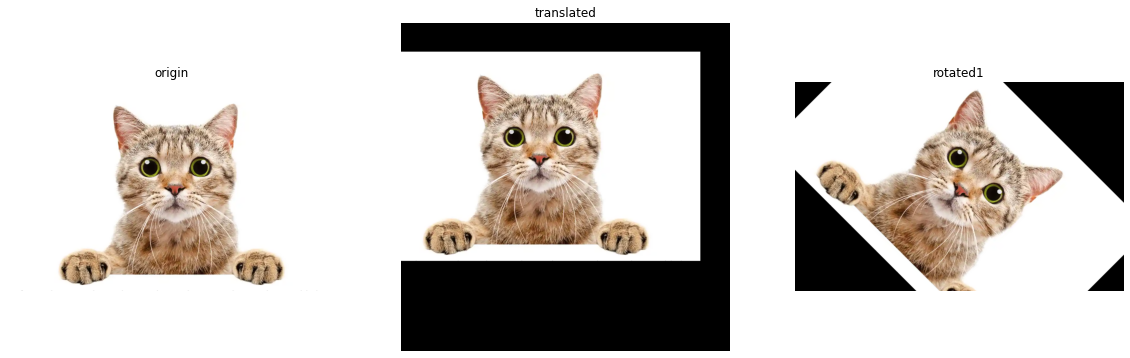

In [91]:
plt.rcParams['figure.figsize']=(20,20)
plt.subplot(1,3,1)
img = cv2.imread('./cat.png')
plt.title('origin')
plt.axis('off')
plt.imshow(img[:,:,::-1])

# translation
# cv2.warpAffine(img, M, (w, h))
# M 仿射矩陣，(w, h) 圖片長寬
# -x → 往左移動 ; x → 往右移動
# -y → 往上移動 ; y → 往下移動

def translation(img, x, y):
    M = np.float32([[1,0,x],[0,1,y]])
    w,h = (img.shape[1], img.shape[1])
    return cv2.warpAffine(img, M, (w,h))

translated = translation(img, -100, 100)
plt.subplot(1,3,2)
plt.title('translated')
plt.axis('off')
plt.imshow(translated[:,:,::-1])

# rotation
# cv2.getRotationMatrix2D((x, y), angle, scale)
# (x, y) 旋轉的中心點，angle 旋轉角度 ( - 順時針，+ 逆時針 )，scale 旋轉後的尺寸

def rotation(img, angle):
    (h, w) = img.shape[:2]
    (x, y) = (w//2, h//2)
    M = cv2.getRotationMatrix2D((x,y), angle, 1.0)
    return cv2.warpAffine(img, M, (w, h))

rotated1 = rotation(img, -45)
plt.subplot(1,3,3)
plt.title('rotated1')
plt.axis('off')
plt.imshow(rotated1[:,:,::-1])

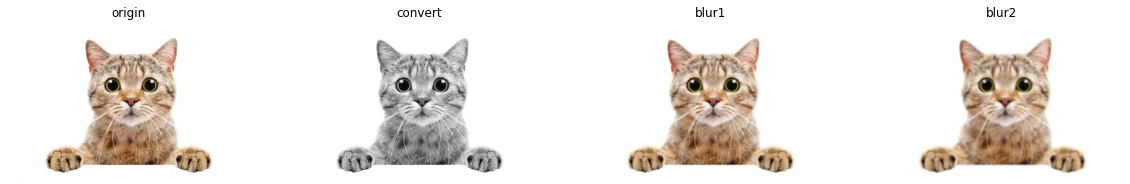

In [51]:
plt.rcParams['figure.figsize']=(20,20)
plt.subplot(1,4,1)
img = cv2.imread('./cat.png')
plt.title('origin')
plt.axis('off')
plt.imshow(img[:,:,::-1])

# converting
convert = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.subplot(1,4,2)
plt.title('convert')
plt.axis('off')
plt.imshow(convert,cmap='gray')

# blur
# 使影像平滑、降低雜訊
# kernel size需為奇數，sigma越大越模糊
# cv2.GaussianBlur(gray,(kernel_size, kernel_size), sigma)
plt.subplot(1,4,3)
blur1 = cv2.GaussianBlur(img, (9,9), 1.5)
plt.title('blur1')
plt.axis('off')
plt.imshow(blur1[:,:,::-1])

plt.subplot(1,4,4)
blur2 = cv2.GaussianBlur(img, (9,9), 5.5)
plt.title('blur2')
plt.axis('off')
plt.imshow(blur2[:,:,::-1])

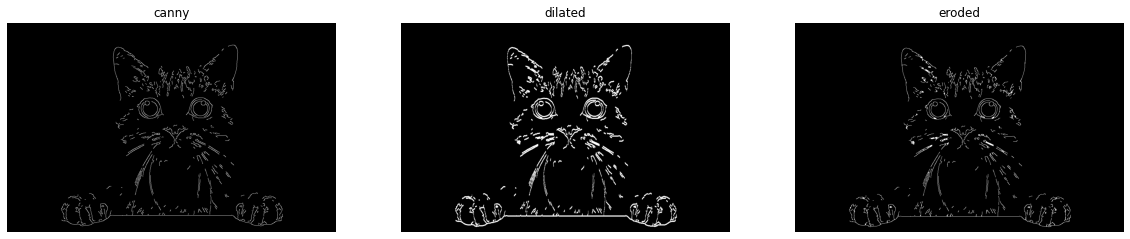

In [61]:
plt.rcParams['figure.figsize']=(20,20)

# edge casade
# 通常會先將影像模糊化後，再進行輪廓化，這樣抓到的雜訊比較少
# cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.subplot(1,3,1)
canny = cv2.Canny(blur1, 125, 175)
plt.title('canny')
plt.axis('off')
plt.imshow(canny,cmap='gray')

# 膨脹、侵蝕通常會使用已經輪廓化的影像
# dilating 
#cv2.dilate(img,(kernel_size, kernel_size), iterations)
# iterations：膨脹次數
plt.subplot(1,3,2)
dilated = cv2.dilate(canny, (7,7), iterations=3)
plt.title('dilated')
plt.axis('off')
plt.imshow(dilated,cmap='gray')

# eroding
#cv2.erode(img,(kernel_size, kernel_size), iterations)
# iterations：膨脹次數
plt.subplot(1,3,3)
eroded = cv2.erode(dilated, (7,7), iterations=3)
plt.title('eroded')
plt.axis('off')
plt.imshow(eroded,cmap='gray')


# 四、圖片結構

+ 輪廓(contours)
+ 層級(hierarchies)


共有144個輪廓


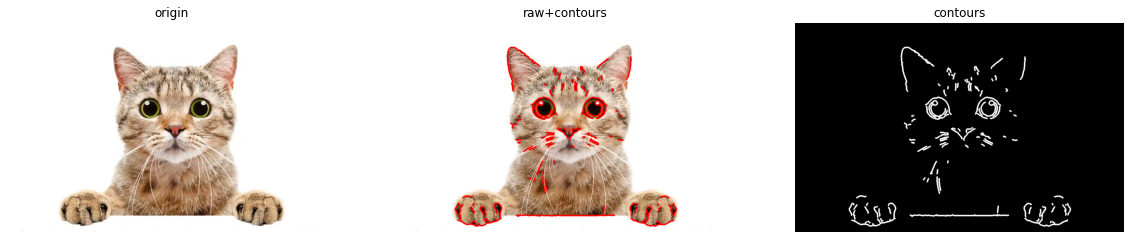

In [79]:
plt.rcParams['figure.figsize']=(20,20)
plt.subplot(1,3,1)
img = cv2.imread('./cat.png')
plt.title('origin')
plt.axis('off')
plt.imshow(img[:,:,::-1])

# 通常會先講影像做灰階和blur
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), cv2.BORDER_DEFAULT)
canny = cv2.Canny(blur, 125, 175)

contours, hierarchies = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# 計算總共有多少輪廓
print(f'共有{len(contours)}個輪廓')

# 畫出當前所有的輪廓
plt.subplot(1,3,2)
new1 = cv2.drawContours(img, contours, -1, (0,0,255), 3)
plt.title('raw+contours')
plt.axis('off')
plt.imshow(new1[:,:,::-1])

# 標示出輪廓
plt.subplot(1,3,3)
blank = np.zeros(img.shape, dtype='uint8')
new2 = cv2.drawContours(blank, contours, -1, (255,255,255), 3)
plt.title('contours')
plt.axis('off')
plt.imshow(new2[:,:,::-1])

共有1301個輪廓


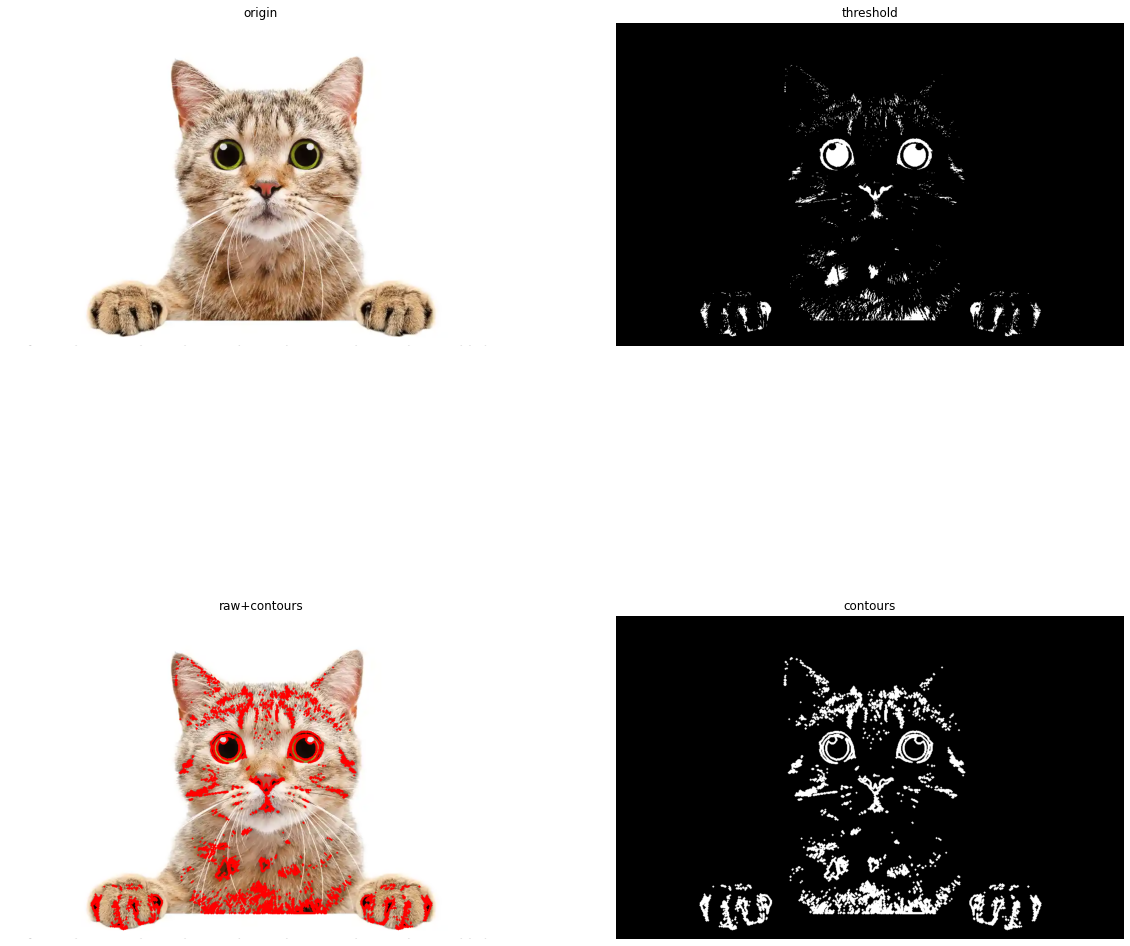

In [77]:
plt.rcParams['figure.figsize']=(20,20)
plt.subplot(2,2,1)
img = cv2.imread('./cat.png')
plt.title('origin')
plt.axis('off')
plt.imshow(img[:,:,::-1])

# 先利用threshold做前處理，threshold會將影像做二值化（黑或白）
plt.subplot(2,2,2)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY_INV)
plt.title('threshold')
plt.axis('off')
plt.imshow(thresh, cmap='gray')

contours, hierarchies = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# 計算總共有多少輪廓
print(f'共有{len(contours)}個輪廓')

# 畫出當前所有的輪廓
plt.subplot(2,2,3)
new1 = cv2.drawContours(img, contours, -1, (0,0,255), 3)
plt.title('raw+contours')
plt.axis('off')
plt.imshow(new1[:,:,::-1])

# 標示出輪廓
plt.subplot(2,2,4)
blank = np.zeros(img.shape, dtype='uint8')
new2 = cv2.drawContours(blank, contours, -1, (255,255,255), 3)
plt.title('contours')
plt.axis('off')
plt.imshow(new2[:,:,::-1])

# findContours用法
contours, hierarchy = cv.findContours(img, mode, method)
+ img：輸入影像
+ mode：輪廓檢索模式
+ method：輪廓近似方式


+ 輪廓檢索模式：輪廓具有父子關係，也就是說輪廓內還有其他輪廓，透過這參數可以決定是否選取。例如一個房子的輪廓可能包含一個矩形窗戶，房子則為父，窗戶為子
    + RETR_LIST：提取所有輪廓，不建立父子關係
    + RETR_EXTERNAL：返回最外層的輪廓，所有子輪廓都會被忽略
    + RETR_CCOMP：返回所有輪廓，並將輪廓建立成兩級組織結構
    + RETR_TREE：返回所有輪廓，並建立完整的組織結構表（爺爺、父、子、孫子）
 
+ 輪廓近似方式
    + cv2.CHAIN_APPROX_NONE：輪廓的所有點都會被儲存
    + cv2.CHAIN_APPROX_SIMPLE：壓縮輪廓，去除多餘的點。例如四邊形只儲存四個角的點

共有4個輪廓


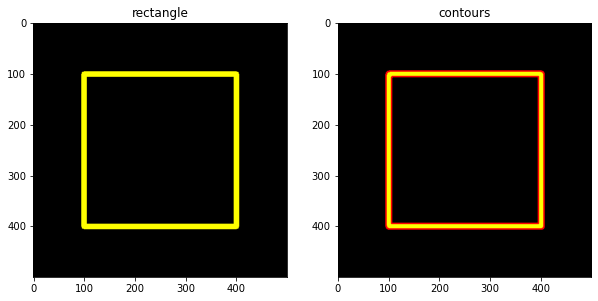

In [40]:
# 以下範例利用一個矩形測試上述的參數
import cv2 
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,10)

blank = np.zeros((500,500,3), dtype='uint8')
rectangle = cv2.rectangle(blank, (100,100), (400,400), (0,255,255), 10)
plt.subplot(1,2,1)
plt.title('rectangle')
plt.imshow(rectangle[:,:,::-1])

canny = cv2.Canny(rectangle, 127, 175)
contours, _ = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# 計算總共有多少輪廓
print(f'共有{len(contours)}個輪廓')
new1 = cv2.drawContours(rectangle, contours, -1, (0,0,255), 2)
plt.subplot(1,2,2)
plt.title('contours')
plt.imshow(new1[:,:,::-1])